
<a id='opt-tax-recur'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Tributação Ótima com Dívida Contigente

## Conteúdo

- [Tributação Ótima com Dívida Contigente](#Tributação-Ótima-com-Dívida-Contigente)  
  - [Resumo](#Resumo)  
  - [Um Equilíbrio Competitivo com Impostos Distorcivos](#Um-Equilíbrio-Competitivo-com-Impostos-Distorcivos)  
  - [Formulação Recursiva do Problema de Ramsey](#Formulação-Recursiva-do-Problema-de-Ramsey)  
  - [Exemplos](#Exemplos)  
  - [Comentários Adicionais](#Comentários-Adicionais)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob a supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo 

Essa aula descreve um famoso modelo de política fiscal ideal de Robert E. Lucas Jr. e Nancy Stokey [[LS83]](https://julia.quantecon.org/../zreferences.html#lucasstokey1983).

O modelo revisita questões clássicas sobre como pagar por uma guerra.

Aqui uma *guerra* significa um aumento de despesa governamental mais ou menos temporário em um processo exógeno.

O modelo apresenta:

- um governo que precisa financiar um fluxo exógeno de gastos governamentais com:
  
  - uma taxa fixa sobre o trabalho, ou  
  - compra e vende de uma gama completa de títulos contingentes de Arrow  
  
- uma família representativa que valoriza o consumo e o lazer
- uma função de produção linear que mapeia o trabalho em um único bem
- um planejador de Ramsey que no momento $ t=0 $ escolhe um plano para impostos e
  negociações de [títulos de Arrow](https://en.wikipedia.org/wiki/Arrow_security) para todo $ t \geq 0 $  


Depois de apresentar o modelo em um espaço de sequências, representá-lo-emos
recursivamente em termos de duas equações de Bellman formuladas ao longo do que foi visto em [Modelos Dinâmicos de Stackelberg](https://julia.quantecon.org/dyn_stack.html).

Como em [Modelos Dinâmicos de Stackelberg](https://julia.quantecon.org/dyn_stack.html), aplicar programação dinâmica
definiremos o vetor de estado artisticamente.

Em particular, incluiremos variáveis prospectivas que resumam as condições ideais as
respostas de agentes privados a um plano de Ramsey.

Veja [tributação ótima](https://julia.quantecon.org/lqramsey.html) para uma análise dentro de uma configuração quadrática linear.

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics
using QuantEcon, NLsolve, NLopt, Interpolations

## Um Equilíbrio Competitivo com Impostos Distorcivos

Para $ t \geq 0 $, um histórico $ s^t = [s_t, s_{t-1}, \ldots, s_0] $ de um estado exógeno $ s_t $ tem densidade de probabilidade conjunta $ \pi_t(s^t) $.

Começamos assumindo que o governo compra $ g_t(s^t) $ no período $ t \geq 0 $ dependente de $ s^t $.

Seja $ c_t(s^t) $,  $ \ell_t(s^t) $, e $ n_t(s^t) $ denotando consumo,
lazer, e oferta de trabalho, respectivamente, no histórico $ s^t $ e data $ t $.

Uma família representativa é dotada de uma unidade de tempo que pode ser dividido entre lazer $ \ell_t $ e trabalho $ n_t $:


<a id='equation-feas1-opt-tax'></a>
$$
n_t(s^t) + \ell_t(s^t) = 1 \tag{1}
$$

A produção é igual a $ n_t(s^t) $ e pode ser dividida entre $ c_t(s^t) $ e $ g_t(s^t) $


<a id='equation-tss-techr-opt-tax'></a>
$$
c_t(s^t) + g_t(s^t) = n_t(s^t) \tag{2}
$$

As preferências de uma família representativa sobre $ \{c_t(s^t), \ell_t(s^t)\}_{t=0}^\infty $ são ordenadas por:


<a id='equation-ts-prefr-opt-tax'></a>
$$
\sum_{t=0}^\infty \sum_{s^t} \beta^t \pi_t(s^t) u[c_t(s^t), \ell_t(s^t)] \tag{3}
$$

onde a função de utilidade $ u $ é crescente, estritamente côncava, e diferênciavel continuamente três vezes em ambos os argumentos.

A tecnologia estabelece uma taxa salarial antes de impostos para a união de todos $ t, s^t $.

O governo impõe uma taxa fixa $ \tau_t(s^t) $ sobre a renda do trabalho no período $ t $, histórico $ s^t $.

Existem mercados completos em títulos Arrow de um período.

Uma unidade de um título de Arrow é emitida no período $ t $ para o histórico $ s^t $
e com promessa de pagamento em uma unidade de tempo $ t+1 $ o consumo no estado $ s_{t+1} $
custa $ p_{t+1}(s_{t+1}|s^t) $.

O governo emite títulos Arrow de um período a cada período.

O governo tem uma sequência de restrições orçamentárias cujo componente de tempo $ t \geq 0 $ é:


<a id='equation-ts-govr'></a>
$$
g_t(s^t) =   \tau_t(s^t)  n_t(s^t) + \sum_{s_{t+1}} p_{t+1}(s_{t+1} | s^t) b_{t+1}(s_{t+1} | s^t) -
b_t(s_t | s^{t-1}) \tag{4}
$$

onde

- $ p_{t+1}(s_{t+1}|s^t) $ é um preço de equilíbrio competitivo de uma unidade de
  consumo na data $ t+1 $ no estado $ s_{t+1} $ na data $ t $ é histórico $ s^t $  
- $ b_t(s_t|s^{t-1}) $ é dívida do governo vencendo no momento $ t $, histórico $ s^t $.  


A dívida do governo $ b_0(s_0) $ é uma condição inicial exógena.

A família representativa possui uma sequência de restrições orcamentárias cujo o componente de tempo $ t\geq 0 $ é:

<a id='equation-ts-bcr'></a>
$$
c_t(s^t) + \sum_{s_{t+1}} p_t(s_{t+1} | s^t) b_{t+1}(s_{t+1} | s^t)
=  \left[1-\tau_t(s^t)\right]  n_t(s^t) + b_t(s_t | s^{t-1}) \quad \forall t \geq 0. \tag{5}
$$

Uma **política governamental** é uma sequência exógena $ \{g(s_t)\}_{t=0}^\infty $,
uma sequência da taxa de imposto $ \{\tau_t(s^t)\}_{t=0}^\infty $, e uma sequência da dívida do governo $ \{b_{t+1}(s^{t+1})\}_{t=0}^\infty $.

Uma **alocação factível** é um plano de consumo e trabalho $ \{c_t(s^t), n_t(s^t)\}_{t=0}^\infty $
que satisfaz [(2)](#equation-tss-techr-opt-tax) em todos $ t, s^t $.

Um **sistema de preços** é um sequência de títulos de Arrow $ \{p_{t+1}(s_{t+1} | s^t) \}_{t=0}^\infty $.

A família enfrenta o sistema de preços como uma tomadora de preços e assume a política governamental como dada.

A família escolhe $ \{c_t(s^t), \ell_t(s^t)\}_{t=0}^\infty $ para maximizar [(3)](#equation-ts-prefr-opt-tax) sujeito a [(5)](#equation-ts-bcr) e [(1)](#equation-feas1-opt-tax) para todo $ t, s^t $.

Um **equilíbrio competitívo com impostos distorcivos** é uma alocação factível,
um sistema de preços, e uma política governamental de modo que:

- Dado o sistema de preços e a política do governamental, a alocação resolve o problema
  problema de otimização da família.  
- Dada a alocação, política governamental, e sistema de preços, a restrição orcamentária do governo é satisfeita para todo $ t, s^t $.  


Nota: Existem muitos equilíbrios competitivos com impostos distorcivos.

Eles são indexados por diferentes políticas governamentais.

O **problema de Ramsey** ou **problema de tributação ótima** é escolher um equilíbrio competitivo com impostos distorcivos que maximiza [(3)](#equation-ts-prefr-opt-tax).

### Versão de Arrow-Debreu do Sistema de Preços

Às vezes, achamos conveniente trabalhar com o sistema de preços Arrow-Debreu, que é
implícita por uma sequência de preços de valores mobiliários da Arrow.

Seja $ q_t^0(s^t) $ o preço no momento $ 0 $, medido o consumo de bens no tempo $ 0 $, sendo uma unidade de consumo por vez $ t $, histórico $ s^t $.

A recursão a seguir relaciona os preços de Arrow-Debreu $ \{q_t^0(s^t)\}_{t=0}^\infty $
aos preços dos títulos de Arrow $ \{p_{t+1}(s_{t+1}|s^t)\}_{t=0}^\infty $


<a id='equation-ts-foc'></a>
$$
q^0_{t+1}(s^{t+1}) = p_{t+1}(s_{t+1}|s^t) q^0_t(s^t) \quad s.t. \quad q_0^0(s^0) = 1 \tag{6}
$$

Os preços de Arrow-Debreu são úteis quando queremos compactar uma sequência de restrições orcamentárias em uma única restrição orçamentária intertemporal, como acharemos conveniente fazer abaixo.

### Abordagem Primitiva

Aplicamos uma abordagem populara para resolver o problema de Ramsey, chamado de *abordagem primitiva*.

A ideia é utilizar as condições de primeira ordem da otimização das famílias para
elimine impostos e preços em favor de quantidades e, em seguida, colocar um problema de otimização
totalmente em termos de quantidades.

Depois que quantidades de Ramsey forem encontradas, impostos e preços poderão ser desfeitos
da alocação.

A abordagem primitiva utiliza quatro passos:

> 1. Obtenha as condições de primeira ordem para o problema das famílias e resolva eles para $ \{q^0_t(s^t), \tau_t(s^t)\}_{t=0}^\infty $ como funções de alocação $ \{c_t(s^t), n_t(s^t)\}_{t=0}^\infty $.

2. Substitua essas expressões por impostos e preços em termos de alocação
na restrição orcamentária em valores presente das famílias.

> - Essa restrição intertemporal envolve apenas a alocação e é considerada
  como uma *restrição de implementabilidade*.



3. Encontre a alocação que maximize a utilidade da família representativa
[(3)](#equation-ts-prefr-opt-tax) sujeito as restrições factíveis [(1)](#equation-feas1-opt-tax)
e [(2)](#equation-tss-techr-opt-tax)  e a condição de implementabilidade derivada no passo 2.

> - Esssa alocação ótima é chamada de **alocação de Ramsey**.  



4. Use a alocação de Ramsey junto com as fórmulas do passo 1 para encontrar os impostos e preços.

### A Restrição de Implementabilidade

Por substituição sequencial de uma restrição orçamentária de um período [(5)](#equation-ts-bcr) em outra, podemos obter a restrição orcamentária em valores presente da família:


<a id='equation-ts-bcpv2'></a>
$$
\sum_{t=0}^\infty \sum_{s^t} q^0_t(s^t) c_t(s^t) =
\sum_{t=0}^\infty \sum_{s^t} q^0_t(s^t) [1-\tau_t(s^t)] n_t(s^t) +
b_0 \tag{7}
$$

$ \{q^0_t(s^t)\}_{t=1}^\infty $ pode ser interpretado como período $ 0 $ no
sistema de preços de Arrow-Debreu.

Para abordar o problema de Ramsey, estudamos a otimização do problema das famílias.

As condições de primeira ordem para o problema das famílias para $ \ell_t(s^t) $
e $ b_t(s_{t+1}| s^t) $, respectivamente, implicam:


<a id='equation-lsa-taxr'></a>
$$
(1 - \tau_t(s^t)) = {\frac{u_l(s^t)}{u_c(s^t)}} \tag{8}
$$

e


<a id='equation-ls101'></a>
$$
p_{t+1}(s_{t+1}| s^t) = \beta \pi(s_{t+1} | s^t) \left({\frac{u_c(s^{t+1})}{u_c({s^t})}} \right) \tag{9}
$$

onde $ \pi(s_{t+1} | s^t) $ é a distribuição de probabilidade de  $ s_{t+1} $
condicionado ao histórico $ s^t $.

A equação [(9)](#equation-ls101) implica que o sistema de preços de Arrow-Debreu satisfaz:


<a id='equation-ls102'></a>
$$
q_t^0(s^t) = \beta^{t} \pi_{t}(s^{t})
                            {u_c(s^{t})  \over u_c(s^0)} \tag{10}
$$

Usando as condições de primeira ordem [(8)](#equation-lsa-taxr) e [(9)](#equation-ls101) para elimiar impostos e preços de [(7)](#equation-ts-bcpv2), derivamos a *condição de implementabilidade*


<a id='equation-tss-cham1'></a>
$$
\sum_{t=0}^\infty  \sum_{s^t} \beta^t \pi_t(s^t)
         [u_c(s^t) c_t(s^t) - u_\ell(s^t) n_t(s^t)] -
         u_c(s^0) b_0 = 0. \tag{11}
$$

O **problema de Ramsey** é escolher uma alocação factível que maximiza


<a id='equation-ts-prefr2'></a>
$$
\sum_{t=0}^\infty \sum_{s^t} \beta^t \pi_t(s^t) u[c_t(s^t), 1 - n_t(s^t)] \tag{12}
$$

sujeito a [(11)](#equation-tss-cham1).

### Detalhes da Solução

Primeiro definimos uma “pseudo função de utilidade”


<a id='equation-ts-cham17'></a>
$$
V\left[c_t(s^t), n_t(s^t), \Phi\right] =
u[c_t(s^t),1-n_t(s^t)] +
\Phi \left[ u_c(s^t) c_t(s^t) -
u_\ell(s^t) n_t(s^t) \right] \tag{13}
$$

onde $ \Phi $ é um multiplicador de Lagrange na condição de implementabilidade [(7)](#equation-ts-bcpv2).

Em seguida a partir do Lagrangiano:

<a id='equation-ts-chamlag'></a>
$$
J  = \sum_{t=0}^\infty
\sum_{s^t} \beta^t \pi_t(s^t)
\Bigl\{
    V[c_t(s^t), n_t(s^t), \Phi]   + \theta_t(s^t)
   \Bigl[ n_t(s^t) - c_t(s^t) - g_t(s_t) \Bigr]
\Bigr\} - \Phi u_c(0) b_0 \tag{14}
$$

onde  $ \{\theta_t(s^t); \forall s^t\}_{t\geq0} $ é uma sequência de multiplicadores de Lagrange em condições factíveis [(2)](#equation-tss-techr-opt-tax).

Dada uma divida governamental inicial $ b_0 $, queremos maximizar $ J $
com respeito a $ \{c_t(s^t), n_t(s^t); \forall s^t \}_{t\geq0} $ e minimizar com respeito a $ \{\theta(s^t); \forall s^t \}_{t\geq0} $.

As condições de primeira ordem para o problema de Ramsey para os períodos $ t \geq 1 $ e $ t=0 $, respectivamente são:


<a id='equation-eqfoncramsey1'></a>
$$
\begin{aligned}
    c_t(s^t)\rm{:} &
    \; (1+\Phi) u_c(s^t) + \Phi \left[u_{cc}(s^t) c_t(s^t) -
    u_{\ell c}(s^t) n_t(s^t) \right]  - \theta_t(s^t) = 0, \quad t \geq 1
    \\
    n_t(s^t)\rm{:} &
    \; -(1+\Phi) u_{\ell}(s^t) - \Phi \left[u_{c\ell}(s^t) c_t(s^t) -
    u_{\ell \ell}(s^t) n_t(s^t) \right] + \theta_t(s^t) = 0, \quad t \geq 1
\end{aligned} \tag{15}
$$

e


<a id='equation-eqfoncramsey0'></a>
$$
\begin{aligned}
    c_0(s^0, b_0)\rm{:} &
    \; (1+\Phi) u_c(s^0, b_0) + \Phi \left[u_{cc}(s^0, b_0) c_0(s^0, b_0) -
    u_{\ell c}(s^0, b_0) n_0(s^0, b_0) \right]  - \theta_0(s^0, b_0)   \\
       & \quad \quad \quad \quad \quad \quad  - \Phi u_{cc}(s^0, b_0) b_0 = 0
    \\
    n_0(s^0, b_0)\rm{:} &
    \; -(1+\Phi) u_{\ell}(s^0, b_0) - \Phi \left[u_{c\ell}(s^0, b_0) c_0(s^0, b_0) -
    u_{\ell \ell}(s^0, b_0) n_0(s^0, b_0) \right] + \theta_0(s^0, b_0) \\
      & \quad \quad \quad \quad \quad \quad + \Phi u_{c \ell}(s^0, b_0) b_0 = 0
\end{aligned} \tag{16}
$$

Observe como essas condições de primeira ordem diferem entre $ t=0 $ e $ t \geq 1 $.

É instrutivo usar condições de primeira ordem [(15)](#equation-eqfoncramsey1) para
$ t \geq 1 $ para eliminar os multiplicadores $ \theta_t(s^t) $.

Por conveniência, suprimimos o tempo subscrito e o índice $ s^t $ e obtemos


<a id='equation-ts-barg'></a>
$$
\begin{aligned}
  (1+\Phi) &u_c(c,1-c-g) + \Phi \bigl[c u_{cc}(c,1-c-g) -
  (c+g) u_{\ell c}(c,1-c-g) \bigr]
    \\
    &= (1+\Phi) u_{\ell}(c,1-c-g) + \Phi \bigl[c u_{c\ell}(c,1-c-g) -
    (c+g) u_{\ell \ell}(c,1-c-g)  \bigr]
\end{aligned} \tag{17}
$$

onde impusemos condições [(1)](#equation-feas1-opt-tax) e [(2)](#equation-tss-techr-opt-tax).

A equação [(17)](#equation-ts-barg) é uma equação que pode ser resolvida para expressar o $ c $ desconhecido como uma função de variáveis exógenas $ g $.

Também sabemos que o período $ t=0 $, quantidades $ c_0 $ e $ n_0 $ satisfazem:


<a id='equation-ts-barg-aust'></a>
$$
\begin{aligned}
      (1+\Phi) &u_c(c,1-c-g) + \Phi \bigl[c u_{cc}(c,1-c-g) -
      (c+g) u_{\ell c}(c,1-c-g) \bigr]
        \\
        &= (1+\Phi) u_{\ell}(c,1-c-g) + \Phi \bigl[c u_{c\ell}(c,1-c-g) -
        (c+g) u_{\ell \ell}(c,1-c-g)  \bigr] + \Phi (u_{cc} - u_{c,\ell}) b_0
\end{aligned} \tag{18}
$$

Observe que uma contraparte de $ b_0 $ *não* aparece em [(17)](#equation-ts-barg), então $ c $ não depende disso para $ t \geq 1 $.

Mas as coisas são diferentes para o tempo $ t=0 $.

Um argumento análogo para $ t=0 $, as equações [(16)](#equation-eqfoncramsey0) conduz
para uma equação que pode ser resolvida por $ c_0 $ como uma função de um par $ (g(s_0), b_0) $.

Esses resultados significam que a afirmação a seguir seria verdadeira mesmo quando as
compras governamentais são funções dependentes do histórico $ g_t (s^t) $ e do
histórico de $ s^t $.

**Proposição:**
Se as compras do governo forem iguais após dois históricos
$ s^t $ e $ \tilde s^\tau $ para $ t,\tau\geq0 $, ou seja, se

$$
g_t(s^t) = g^\tau(\tilde s^\tau) = g
$$

então segue de [(17)](#equation-ts-barg) que as escolhas de consumo e lazer de Ramsey,
$ (c_t(s^t),\ell_t(s^t)) $ e $ (c_j(\tilde s^\tau),\ell_j(\tilde
s^\tau)) $, são idênticas.

A proposição afirma que a alocação ótima é uma função da
quantidade atual de compras realizadas pelo governo $ g $ somente e
*não* depende do histórico específico que precedeu a realização de $ g $.

### A Alocação de Ramsey para Dado $ \Phi $

Temporariamente tomamos $ \Phi $ como dado.

Devemos computar $ c_0(s^0, b_0) $ e $ n_0(s^0, b_0) $ a partir dascondições de primeira ordem [(16)](#equation-eqfoncramsey0).

Evidentemente, para $ t \geq 1 $, $ c $ e
$ n $ dependem do somente tempo $ t $ e realization de $ g $.

Mas para $ t=0 $, $ c $ e $ n $ ambos dependem de $ g_0 $ e do débito inicial do governo $ b_0 $.

Então, enquanto $ b_0 $
influencia $ c_0 $ e $ n_0 $, não aparece a variável análoga
$ b_t $ que influência $ c_t $ e $ n_t $ para
$ t \geq 1 $.

A ausência de $ b_t $ como determinante da alocação de Ramsey para
$ t \geq 1 $ e sua presença para $ t=0 $ é um sintoma da
*inconsistência no tempo* do plano de Ramsey.

$ \Phi $ deve assumir um valor que garanta que
a família e as restrições orçamentárias do governo são ambas
satisfeitas com uma alocação e sistema de preços de Ramsey associado
com esse $ \Phi $.

### Especialização Adicional

Nesse ponto, é útil especializar o modelo das seguintes maneiras.

Assumimos que $ s $ é governado por uma cadeia Markov de estado finito com estados
$ s\in [1, \ldots, S] $ e matriz de transição $ \Pi $, onde

$$
\Pi(s'|s) = {\rm Prob}(s_{t+1} = s'| s_t =s)
$$

Também, assuma que os gastos do governo $ g $ são uma função exata invariável no tempo
$ g(s) $ de $ s $.

Mantemos essas premissas durante o restante desta aula.

### Determinando $ \Phi $

Concluímos o plano de Ramsey calculando o multiplicador de Lagrange $ \ Phi $
na restrição de implementabilidade [(11)](#equation-tss-cham1).

O saldo orçamentário do governo restringe $ \Phi $ através da seguinte linha de raciocínio.

As condições de primeira ordem da família implicam:


<a id='equation-lsa-ta'></a>
$$
(1 - \tau_t(s^t)) = {\frac{u_l(s^t)}{u_c(s^t)} } \tag{19}
$$

e os preços implícitos de um período dos títulos de Arrow:


<a id='equation-lsa-arro'></a>
$$
p_{t+1}(s_{t+1}| s^t) = \beta \Pi(s_{t+1} | s_t) {\frac{u_c(s^{t+1})}{u_c({s^t})}} \tag{20}
$$

Substituindo a partir de  [(19)](#equation-lsa-ta), [(20)](#equation-lsa-arro), e a condição de viabilidade
[(2)](#equation-tss-techr-opt-tax) na versão recursiva [(5)](#equation-ts-bcr) da restrição orcamentária das famílias temos

<a id='equation-lsa-budget'></a>
$$
\begin{aligned}
    u_c(s^t) [ n_t(s^t) - g_t(s^t)] +
    \beta \sum_{s_{t+1}} \Pi (s_{t+1}| s_t) u_c(s^{t+1}) b_{t+1}(s_{t+1} | s^t) = \\
    u_l (s^t) n_t(s^t) + u_c(s^t) b_t(s_t | s^{t-1})
\end{aligned} \tag{21}
$$

Defina $ x_t(s^t) = u_c(s^t) b_t(s_t | s^{t-1}) $.

Perceba que $ x_t(s^t) $ aparece no lado direito de [(21)](#equation-lsa-budget) enquanto
$ \beta $ vezes a expectativa condicional de
$ x_{t+1}(s^{t+1}) $ aparece no lado esquerdo.

Portando a equação compartilha grande parte da estrutura de uma equação simples de precificação de ativos
$ x_t $ sendo análogo ao preço do ativo no momento $ t $.

Aprendemos anteriormente que, para uma alocação de Ramsey
$ c_t(s^t), n_t(s^t) $ e $ b_t(s_t|s^{t-1}) $, e portanto
também $ x_t(s^t) $, são funções somente de $ s_t $, sendo independente do histórico $ s^{t-1} $ para $ t \geq 1 $.

Isso significa que podemos expressar a equação [(21)](#equation-lsa-budget) como:


<a id='equation-lsa-budget2'></a>
$$
u_c(s)
[ n(s) - g(s)]  + \beta
\sum_{s'} \Pi(s' | s) x'(s')  = u_l(s) n(s) + x(s) \tag{22}
$$

onde $ s' $ denota o valor do próximo período de $ s $ e
$ x'(s') $ denota o valor do próximo período de $ x $.

A equação [(22)](#equation-lsa-budget2) é fácil de resolver para $ x(s) $ quando
$ s = 1, \ldots , S $.

Se fizermos $ \vec n, \vec g, \vec x $
denotar vetores $ S \times 1 $ cujo $ i $-ésimo elementos são os respectivos valores $ n, g $, e $ x $ quando $ s=i $, e seja
$ \Pi $ a matriz de transição para o estado de Markov $ s $,
então podemos expressar [(22)](#equation-lsa-budget2) como a equação da matriz


<a id='equation-lsa-budget20'></a>
$$
\vec u_c(\vec n - \vec g) + \beta \Pi \vec x = \vec u_l \vec n + \vec x \tag{23}
$$

Isso é um sistema de $ S $ equações lineares no vetor $ x $ $ S \times 1 $, cuja a solução é:


<a id='equation-lsa-xsol'></a>
$$
\vec x= (I - \beta \Pi )^{-1} [ \vec u_c (\vec n-\vec g) - \vec u_l \vec n] \tag{24}
$$

Nessas equações, seja $ \vec u_c \vec n $, por exemplo, nós queremos dizer que há uma
multiplicação elemento-a-elemento dos dois vetores

Depois de resolver para $ \vec x $, podemos encontrar $ b(s_t|s^{t-1}) $ no estado de Markov $ s_t=s $ a partir de $ b(s) = {\frac{x(s)}{u_c(s)}} $ ou na equação da matriz


<a id='equation-lsa-bsol'></a>
$$
\vec b = {\frac{ \vec x }{\vec u_c}} \tag{25}
$$

onde divisão aqui significa divisão elemento-a-elemento da respectiva
componentes dos vetores $ S \times 1 $  $ \vec x $ e
$ \vec u_c $.

Aqui está um algoritmo computacional:

1. Comece com uma estimativa do valor para $ \Phi $, então use o
  condições de primeira ordem e condições de viabilidade para calcular
  $ c(s_t), n(s_t) $ para $ s \in [1,\ldots, S] $ e
  $ c_0(s_0,b_0) $ e $ n_0(s_0, b_0) $, dado $ \Phi $  
  - Essas são $ 2  (S+1) $ equações em desconhecidos $ 2  (S+1) $ 
1. Resolva para $ S $ equações [(24)](#equation-lsa-xsol) para os $ S $ elementos
  de $ \vec x $  
  - estes dependem de $ \Phi $  
1. Encontre um $ \Phi $ que satisfaça
  
  $$
  u_{c,0} b_0 = u_{c,0} (n_0 - g_0) - u_{l,0} n_0  + \beta \sum_{s=1}^S \Pi(s | s_0) x(s) \tag{26}
  $$
  
  aumentando gradualmente $ \Phi $ se o lado esquerdo de [(26)](#equation-bellman2cons)
  exceder o lado direito e diminuindo $ \Phi $ se o lado esquerdo for menor que o lado direito.  
1. Depois de computar a alocação de Ramsey,  recupere a taxa fixa de imposto
  sobre o trabalho de [(8)](#equation-lsa-taxr) e os títulos Arrow implícitos de um período
  preços de [(9)](#equation-ls101).  


Em resumo, quando $ g_t $ é uma função invariante no tempo de um estado de Markov
$ s_t $, um plano de Ramsey pode ser construido resolvendo $ 3S +3 $
equações em $ S $ componentes cada um $ \vec c $, $ \vec n $, e
$ \vec x $ juntos com $ n_0, c_0 $, e $ \Phi $.

### Incositência de Tempo

Seja $ \{\tau_t(s^t)\}_{t=0}^\infty, \{b_{t+1}(s_{t+1}| s^t)\}_{t=0}^\infty $
tempo $ 0 $, estado $ s_0 $ do plano de Ramsey.

Então $ \{\tau_j(s^j)\}_{j=t}^\infty, \{b_{j+1}(s_{j+1}| s^j)\}_{j=t}^\infty $
é de tempo $ t $, histórico $ s^t $ continuação de tempo
$ 0 $, estado $ s_0 $ do plano de Ramsey.

Um tempo $ t $, histórico $ s^t $, o plano Ramsey é um plano Ramsey que
começa nas condições iniciais $ s^t, b_t(s_t|s^{t-1}) $.

Um tempo $ t $, histórico $ s^t $
continuação de um tempo $ 0 $, estado $ 0 $ O plano de Ramsey 
*não* é de tempo $ t $, histórico $ s^t $ do plano de Ramsey.

Isso significa que o plano de Ramsey *não é consistente no tempo*.

Outra maneira de afirma a mesma coisa é assegurar que o plano de Ramsey é *inconsistente no tempo*.

A razão é que uma continuação do plano de Ramsey toma $ u_{ct} b_t(s_t|s^{t-1}) $ como dado, e não
$ b_t(s_t|s^{t-1}) $.

Devemos discutir isso abaixo.

### Especificação com a Utilidade CRRA 

Nos nossos cálculos abaixo e em uma [aula subsequente](https://julia.quantecon.org/amss.html) baseada em uma extensão do modelo de Lucas-Stokey 
por  Aiyagari, Marcet, Sargent, e Seppälä (2002) [[AMSS02]](https://julia.quantecon.org/../zreferences.html#amss2002), modificaremos a função de utilidade de um período assumida acima.

(Adotamos a especificação de utilidade anterior porque era a usada no artigo original [[LS83]](https://julia.quantecon.org/../zreferences.html#lucasstokey1983))

Modificaremos suas especificações assumindo que o agente representativo tenha a função utilidade

$$
u(c,n) = {\frac{c^{1-\sigma}}{1-\sigma}} - {\frac{n^{1+\gamma}}{1+\gamma}}
$$

onde  $ \sigma > 0 $, $ \gamma >0 $.

Continuamos assumindo que

$$
c_t + g_t = n_t
$$

Nos eliminamos o lazer do modelo.

Também eliminamos a restrição de Lucas e Stokey que $ \ell_t + n_t \leq 1 $.

Substituímos essas duas coisas pela suposição de que
trabalho $ n_t \in [0, +\infty] $.

Com esses ajustes, a análise de Lucas e Stokey prevalece quando fazemos as seguintes substituições

$$
\begin{aligned}
u_\ell(c, \ell) &\sim - u_n(c, n) \\
u_c(c,\ell) &\sim u_c(c,n) \\
u_{\ell,\ell}(c,\ell) &\sim u_{nn}(c,n) \\
u_{c,c}(c,\ell)& \sim u_{c,c}(c,n) \\
u_{c,\ell} (c,\ell) &\sim 0 \\
\end{aligned}
$$

Com esses entendimentos, as equações [(17)](#equation-ts-barg) e [(18)](#equation-ts-barg-aust) simplificam no caso da função de utilidade CRRA.

Eles se tornam


<a id='equation-ts-barg10'></a>
$$
(1+\Phi) [u_c(c) + u_n(c+g)] + \Phi[c u_{cc}(c) + (c+g) u_{nn}(c+g)] = 0 \tag{27}
$$

e


<a id='equation-ts-barg11'></a>
$$
(1+\Phi) [u_c(c_0) + u_n(c_0+g_0)] + \Phi[c_0 u_{cc}(c_0) + (c_0+g_0) u_{nn}(c_0+g_0)] - \Phi u_{cc}(c_0) b_0 = 0 \tag{28}
$$

Na equação [(27)](#equation-ts-barg10), é entendido que $ c $ e $ g $ são cada uma funções do estado de Markov $ s $.

Além disso, no tempo $ t=0 $ restrição orçamentária é satisfeita em $ c_0 $ e dívida inicial do governo
$ b_0 $:


<a id='equation-opt-tax-eqn-10'></a>
$$
b_0 + g_0 = \tau_0 (c_0 + g_0) + \frac{\bar b}{R_0} \tag{29}
$$

onde $ R_0 $ é a taxa de juros bruta do estado de Markov $ s_0 $ que se supõe prevalecer no momento $ t = 0 $
e $ \tau_0 $ é a taxa de imposto no tempo $ t = 0 $.

Na equação [(29)](#equation-opt-tax-eqn-10), é entendido que

$$
\begin{aligned}
\tau_0 = 1 - \frac{u_{l,0}}{u_{c,0}} \\
R_0 =  \beta  \sum_{s=1}^S \Pi(s | s_0) \frac{u_c(s)}{u_{c,0}}
\end{aligned}
$$

### Implementação da Sequência

Os passos acima são implementados num tipo chamado `equentialAllocation`

In [3]:
using QuantEcon, NLsolve, NLopt, LinearAlgebra, Interpolations

import QuantEcon: simulate

  mutable struct Model{TF <: AbstractFloat,
                      TM <: AbstractMatrix{TF},
                      TV <: AbstractVector{TF}}
      β::TF
      Π::TM
      G::TV
      Θ::TV
      transfers::Bool
      U::Function
      Uc::Function
      Ucc::Function
      Un::Function
      Unn::Function
      n_less_than_one::Bool
  end

  struct SequentialAllocation{TP <: Model,
                              TI <: Integer,
                              TV <: AbstractVector}
      model::TP
      mc::MarkovChain
      S::TI
      cFB::TV
      nFB::TV
      ΞFB::TV
      zFB::TV
  end

function SequentialAllocation(model)
    β, Π, G, Θ = model.β, model.Π, model.G, model.Θ
    mc = MarkovChain(Π)
    S = size(Π, 1)   # número de estados
    # agora encontramos a melhor alocação
    cFB, nFB, ΞFB, zFB = find_first_best(model, S, 1)

    return SequentialAllocation(model, mc, S, cFB, nFB, ΞFB, zFB)
end

function find_first_best(model, S, version)
    if version != 1 && version != 2
        throw(ArgumentError("version must be 1 or 2"))
    end
    β, Θ, Uc, Un, G, Π =
        model.β, model.Θ, model.Uc, model.Un, model.G, model.Π
    function res!(out, z)
        c = z[1:S]
        n = z[S+1:end]
        out[1:S] = Θ .* Uc(c, n) + Un(c, n)
        out[S+1:end] = Θ .* n - c - G
    end
    res = nlsolve(res!, 0.5 * ones(2 * S))

    if converged(res) == false
        error("Could not find first best")
    end

    if version == 1
        cFB = res.zero[1:S]
        nFB = res.zero[S+1:end]
        ΞFB = Uc(cFB, nFB)         # Multiplicador na restrição de recursos
        zFB = vcat(cFB, nFB, ΞFB)
        return cFB, nFB, ΞFB, zFB
    elseif version == 2
        cFB = res.zero[1:S]
        nFB = res.zero[S+1:end]
        IFB = Uc(cFB, nFB) .* cFB + Un(cFB, nFB) .* nFB
        xFB = \(I - β * Π, IFB)
        zFB = [vcat(cFB[s], xFB[s], xFB) for s in 1:S]
        return cFB, nFB, IFB, xFB, zFB
    end
end

function time1_allocation(pas::SequentialAllocation, μ)
    model, S = pas.model, pas.S
    Θ, β, Π, G, Uc, Ucc, Un, Unn =
        model.Θ, model.β, model.Π, model.G,
        model.Uc, model.Ucc, model.Un, model.Unn
    function FOC!(out, z)
        c = z[1:S]
        n = z[S+1:2S]
        Ξ = z[2S+1:end]
        out[1:S] = Uc(c, n) .- μ * (Ucc(c, n) .* c .+ Uc(c, n)) .- Ξ # FOC c
        out[S+1:2S] = Un(c, n) .- μ * (Unn(c, n) .* n .+ Un(c, n)) + Θ .* Ξ # FOC n
        out[2S+1:end] = Θ .* n - c - G # Restrição de recurso
        return out
    end
    # encontre a raiz de FOC
    res = nlsolve(FOC!, pas.zFB)
    if res.f_converged == false
        error("Could not find LS allocation.")
    end
    z = res.zero
    c, n, Ξ = z[1:S], z[S+1:2S], z[2S+1:end]
    # agora compute x
    Inv  = Uc(c, n) .* c +  Un(c, n) .* n
    x = \(I - β * model.Π, Inv)
    return c, n, x, Ξ
end

function time0_allocation(pas::SequentialAllocation, B_, s_0)
    model = pas.model
    Π, Θ, G, β = model.Π, model.Θ, model.G, model.β
    Uc, Ucc, Un, Unn =
        model.Uc, model.Ucc, model.Un, model.Unn

    # condições de primeira ordem para o problema do planejador
    function FOC!(out, z)
        μ, c, n, Ξ = z[1], z[2], z[3], z[4]
        xprime = time1_allocation(pas, μ)[3]
        out .= vcat(
            Uc(c, n) .* (c - B_) .+ Un(c, n) .* n + β * dot(Π[s_0, :], xprime),
            Uc(c, n) .- μ * (Ucc(c, n) .* (c - B_) + Uc(c, n)) - Ξ,
            Un(c, n) .- μ * (Unn(c, n) .* n .+ Un(c, n)) + Θ[s_0] .* Ξ,
            (Θ .* n .- c - G)[s_0]
            )
    end

    # encontre a raiz
    res = nlsolve(FOC!, [0.0, pas.cFB[s_0], pas.nFB[s_0], pas.ΞFB[s_0]])
    if res.f_converged == false
        error("Could not find time 0 LS allocation.")
    end
    return (res.zero...,)
end

function time1_value(pas::SequentialAllocation, μ)
    model = pas.model
    c, n, x, Ξ = time1_allocation(pas, μ)
    U_val = model.U.(c, n)
    V = \(I - model.β*model.Π, U_val)
    return c, n, x, V
end

function Τ(model, c, n)
    Uc, Un = model.Uc.(c, n), model.Un.(c, n)
    return 1 .+ Un ./ (model.Θ .* Uc)
end

function simulate(pas::SequentialAllocation, B_, s_0, T, sHist = nothing)

    model = pas.model
    Π, β, Uc = model.Π, model.β, model.Uc

    if isnothing(sHist)
        sHist = QuantEcon.simulate(pas.mc, T, init=s_0)
    end
    cHist = zeros(T)
    nHist = similar(cHist)
    Bhist = similar(cHist)
    ΤHist = similar(cHist)
    μHist = similar(cHist)
    RHist = zeros(T-1)
    # tempo 0
    μ, cHist[1], nHist[1], _  = time0_allocation(pas, B_, s_0)
    ΤHist[1] = Τ(pas.model, cHist[1], nHist[1])[s_0]
    Bhist[1] = B_
    μHist[1] = μ
    # tempo 1 em diante
    for t in 2:T
        c, n, x, Ξ = time1_allocation(pas,μ)
        u_c = Uc(c,n)
        s = sHist[t]
        ΤHist[t] = Τ(pas.model, c, n)[s]
        Eu_c = dot(Π[sHist[t-1],:], u_c)
        cHist[t], nHist[t], Bhist[t] = c[s], n[s], x[s] / u_c[s]
        RHist[t-1] = Uc(cHist[t-1], nHist[t-1]) / (β * Eu_c)
        μHist[t] = μ
    end
    return cHist, nHist, Bhist, ΤHist, sHist, μHist, RHist
end

  mutable struct BellmanEquation{TP <: Model,
                              TI <: Integer,
                              TV <: AbstractVector,
                              TM <: AbstractMatrix{TV},
                              TVV <: AbstractVector{TV}}
      model::TP
      S::TI
      xbar::TV
      time_0::Bool
      z0::TM
      cFB::TV
      nFB::TV
      xFB::TV
      zFB::TVV
  end

function BellmanEquation(model, xgrid, policies0)
    S = size(model.Π, 1) # número de estados
    xbar = collect(extrema(xgrid))
    time_0 = false
    cf, nf, xprimef = policies0
    z0 = [vcat(cf[s](x), nf[s](x), [xprimef[s, sprime](x)
             for sprime in 1:S])
             for x in xgrid, s in 1:S]
    cFB, nFB, IFB, xFB, zFB = find_first_best(model, S, 2)
    return BellmanEquation(model, S, xbar, time_0, z0, cFB, nFB, xFB, zFB)
end

function get_policies_time1(T, i_x, x, s, Vf)
    model, S = T.model, T.S
    β, Θ, G, Π = model.β, model.Θ, model.G, model.Π
    U, Uc, Un = model.U, model.Uc, model.Un

    function objf(z, grad)
        c, xprime = z[1], z[2:end]
        n = c + G[s]
        Vprime = [Vf[sprime](xprime[sprime]) for sprime in 1:S]
        return -(U(c, n) + β * dot(Π[s, :], Vprime))
    end
    function cons(z, grad)
        c, xprime = z[1], z[2:end]
        n = c+G[s]
        return x - Uc(c, n) * c - Un(c, n) * n - β * dot(Π[s, :], xprime)
    end
    lb = vcat(0, T.xbar[1] * ones(S))
    ub = vcat(1 - G[s], T.xbar[2] * ones(S))
    opt = Opt(:LN_COBYLA, length(T.z0[i_x, s])-1)
    min_objective!(opt, objf)
    equality_constraint!(opt, cons)
    lower_bounds!(opt, lb)
    upper_bounds!(opt, ub)
    maxeval!(opt, 300)
    maxtime!(opt, 10)
    init = vcat(T.z0[i_x, s][1], T.z0[i_x, s][3:end])
    for (i, val) in enumerate(init)
        if val > ub[i]
            init[i] = ub[i]
        elseif val < lb[i]
            init[i] = lb[i]
        end
    end
    (minf, minx, ret) = optimize(opt, init)
    T.z0[i_x, s] = vcat(minx[1], minx[1] + G[s], minx[2:end])
    return vcat(-minf, T.z0[i_x, s])
end

function get_policies_time0(T, B_, s0, Vf)
    model, S = T.model, T.S
    β, Θ, G, Π = model.β, model.Θ, model.G, model.Π
    U, Uc, Un = model.U, model.Uc, model.Un
    function objf(z, grad)
        c, xprime = z[1], z[2:end]
        n = c + G[s0]
        Vprime = [Vf[sprime](xprime[sprime]) for sprime in 1:S]
        return -(U(c, n) + β * dot(Π[s0, :], Vprime))
    end
    function cons(z, grad)
        c, xprime = z[1], z[2:end]
        n = c + G[s0]
        return -Uc(c, n) * (c - B_) - Un(c, n) * n - β * dot(Π[s0, :], xprime)
    end
    lb = vcat(0, T.xbar[1] * ones(S))
    ub = vcat(1-G[s0], T.xbar[2] * ones(S))
    opt = Opt(:LN_COBYLA, length(T.zFB[s0])-1)
    min_objective!(opt, objf)
    equality_constraint!(opt, cons)
    lower_bounds!(opt, lb)
    upper_bounds!(opt, ub)
    maxeval!(opt, 300)
    maxtime!(opt, 10)
    init = vcat(T.zFB[s0][1], T.zFB[s0][3:end])
    for (i, val) in enumerate(init)
        if val > ub[i]
            init[i] = ub[i]
        elseif val < lb[i]
            init[i] = lb[i]
        end
    end
    (minf, minx, ret) = optimize(opt, init)
    return vcat(-minf, vcat(minx[1], minx[1]+G[s0], minx[2:end]))
end

get_policies_time0 (generic function with 1 method)

## Formulação Recursiva do Problema de Ramsey

$ x_t(s^t) = u_c(s^t) b_t(s_t | s^{t-1}) $ na equação [(21)](#equation-lsa-budget)
parece ser puramente uma variável “forward-looking”.

Mas $ x_t(s^t) $ também é um candidato natural para uma variável de estado em
uma formulação recursiva do problema de Ramsey.

### Delegação Intertemporal

Para expressar o plano de Ramsey recursivamente, imaginemos que no período $ 0 $
O planejador de Ramsey é seguido por uma sequência de continuação de planejadores de Ramsey
às vezes $ t = 1, 2, \ldots $.

Um "planejador de Ramsey de continuação" tem um
função objetiva diferente e enfrenta restrições diferentes das
Planejador de Ramsey.

Um passo fundamental na representação recursiva de um plano de Ramsey é
considerar a utilidade marginal escalada da dívidas governamental
$ x_t(s^t) = u_c(s^t) b_t(s_t|s^{t-1}) $ como quantidades predeterminadas que
planejadores de Ramsey de continuação às vezes $ t \geq 1 $ são
obrigado a atingir.

Os planejadores da Ramsey de continuação fazem isso escolhendo políticas de continuação que induzem a família representativa a fazer escolhas que impliquem que $ u_c(s^t) b_t(s_t|s^{t-1})= x_t(s^t) $.

No período $ t\geq 1 $ um planejador de Ramsey de continuação entrega $ x_t $ escolhendo um par adequado $ n_t, c_t $ pair e uma lista de
$ s_{t+1} $-quantidades contingentes de continuação $ x_{t+1} $ para
transmitir a um tempo $ t+1 $ continuation planejador de Ramsey.

No período $ t \geq 1 $ o planejador de Ramsey de continuação enfrenta $ x_t, s_t $ como variáveis de estado.

Mas no período $ 0 $ o planejador de Ramsey enfrenta $ b_0 $, e não $ x_0 $,
como uma variável de estado.

Além disso, o planejador de Ramsey se preocupa $ (c_0(s_0), \ell_0(s_0)) $, enquanto os planejadores de Ramsey de continuação não.

No período $ 0 $ o planejador de Ramsey
trata $ x_1 $ como uma função de $ s_1 $ a um tempo $ 1 $
planejador de Ramsey de continuação.

Essas linhas de autoridades delegadas e
responsabilidades ao longo do tempo expressam a 
obrigações dos planejadores de Ramsey de continuação de implementar suas partes do plano original de Ramsey,
projetado de uma vez por todas ao mesmo tempo $ 0 $.

### Duas Equações de Bellman

Depois de $ s_t $ ter sido realizado no momento $ t \geq 1 $, as variáveis de estado que confrontam o tempo $ t $ no **continuação do plano de Ramsey** são
$ (x_t, s_t) $.

- Seja $ V(x, s) $ o valor de uma **continuação do plano de Ramsey** em $ x_t = x, s_t =s $ para $ t \geq 1 $.  
- Seja $ W(b, s) $ o valor de um **plano de Ramsey** no período $ 0 $ em $ b_0=b $ e $ s_0 = s $.  


Trabalhamos retroativamente, apresentando uma equação de Bellman para
$ V(x,s) $ primeiro, então a equação de Bellman para $ W(b,s) $.

### A Continuação do Problema de Ramsey

A equação de Bellman para um perído $ t \geq 1 $ do planejador de Ramsey de continuação é


<a id='equation-lsa-bellman1'></a>
$$
V(x, s) = \max_{n, \{x'(s')\}} u(n-g(s), 1-n) + \beta \sum_{s'\in S} \Pi(s'| s) V(x', s') \tag{30}
$$

onde a maximização sobre $ n $ e os $ S $ elementos de
$ x'(s') $ estão sujeitos à restrição de implementabilidade única para
$ t \geq 1 $


<a id='equation-lsa-bellman1cons'></a>
$$
x = u_c(n-g(s)) -  u_l n + \beta \sum_{s' \in {\cal S}} \Pi(s' | s) x'(s') \tag{31}
$$

Aqui $ u_c $ e $ u_l $ são os valores de hoje das utilidades marginais.

Para cada valor dado $ x, s $, o planejador de Ramsey de continuação escolhe $ n $ e um $ x'(s') $
para cada $ s' \in {\cal S} $.

Associado com uma função de valor $ V(x,s) $ que resolve a equação de Bellman [(30)](#equation-lsa-bellman1)
sendo $ S+1 $ funções de políticas invariantes no tempo


<a id='equation-rrpolicyt'></a>
$$
\begin{aligned}
    n_t & = f(x_t, s_t), \quad t \geq 1
    \\
    x_{t+1}(s_{t+1}) & = h(s_{t+1}; x_t, s_t), \, s_{t+1} \in  {\cal S}, \, t \geq 1
\end{aligned} \tag{32}
$$

### O Problema de Ramsey

A equação de Bellman para o período $ 0 $ do planejador de Ramsey é


<a id='equation-lsa-bellman2'></a>
$$
W(b_0, s_0) = \max_{n_0, \{x'(s_1)\}} u(n_0 - g_0, 1 - n_0) + \beta \sum_{s_1 \in {\cal S}} \Pi(s_1| s_0) V( x'(s_1), s_1) \tag{33}
$$

onde a maximização sobre $ n_0 $ e os $ S $ elementos de
$ x'(s_1) $ estão sujeito ao perído $ 0 $ da restrição de implementabilidade.


<a id='equation-bellman2cons2'></a>
$$
u_{c,0} b_0 = u_{c,0} (n_0 - g_0) - u_{l,0} n_0  + \beta \sum_{s_1\in {\cal S}} \Pi(s_1 | s_0) x'(s_1) \tag{34}
$$

vinda da restrição [(26)](#equation-bellman2cons).

Associada com uma função de valor $ W(b_0, n_0) $ que resolve a equação de Bellman [(33)](#equation-lsa-bellman2) são
$ S +1 $ períodos $ 0 $ funções de políticas


<a id='equation-rrpolicy0'></a>
$$
\begin{aligned}
    n_0
        & = f_0(b_0, s_0) \cr
    x_1(s_1)
        & = h_0(s_1; b_0, s_0)
\end{aligned} \tag{35}
$$

Perceba que a aparencia das variáveis de estado $ (b_0, s_0) $ no período
$ 0 $ das funções de política para o planejador de Ramsey em comparação com
$ (x_t, s_t) $ nas funções de política [(32)](#equation-rrpolicyt) para o período $ t \geq 1 $ do
planejador de Ramsey de continuação.

A função de valor $ V(x_t, s_t) $ do período $ t $ do
planejador de Ramsey de continuação
$ E_t \sum_{\tau = t}^\infty \beta^{\tau - t} u(c_t, l_t) $, onde
os processos de consumo e lazer são avaliados ao longo do processo original
tempo $ 0 $ no plano de Ramsey.

### Condições de Priemeira Ordem
Anexar um multiplicador Lagrange $ \Phi_1(x,s) $ a restrição [(31)](#equation-lsa-bellman1cons) e um multiplicador de Lagrande $ \Phi_0 $ a restrição [(26)](#equation-bellman2cons).

No período $ t \geq 1 $: as condições de primeira ordem para o período $ t \geq 1 $ constrangido a
maximização do problema de Ramsey de continuação no lado direito 
equação de Bellman do planejador [(30)](#equation-lsa-bellman1) são


<a id='equation-lsarxt'></a>
$$
\beta \Pi(s' | s) V_x (x', s') - \beta \Pi(s' | s) \Phi_1 = 0 \tag{36}
$$

para $ x'(s') $ e


<a id='equation-lsarnt'></a>
$$
(1 + \Phi_1) (u_c - u_l ) + \Phi_1 \left[ n (u_{ll} - u_{lc}) + (n-g(s)) (u_{cc} - u_{lc})  \right] = 0 \tag{37}
$$

para $ n $.

Dado $ \Phi_1 $, a equação [(37)](#equation-lsarnt) é uma equação a ser resolvida para $ n $ como uma função de $ s $ (ou de $ g(s) $).

A equação [(36)](#equation-lsarxt) implica $ V_x(x', s')= \Phi_1 $, enquanto a condição do envelope é $ V_x(x,s) = \Phi_1 $, então segue-se que:


<a id='equation-lsaenv'></a>
$$
V_x(x', s') = V_x(x,s) = \Phi_1(x,s) \tag{38}
$$

No período $ t=0 $: no período $ 0 $ o problema no lado direito do planejador de Ramsey da equação de
Bellman [(33)](#equation-lsa-bellman2),  as condições de primeira ordem são


<a id='equation-lsax0'></a>
$$
V_x(x(s_1), s_1) = \Phi_0 \tag{39}
$$

para $ x(s_1), s_1 \in  {\cal S} $, e


<a id='equation-lsan0'></a>
$$
\begin{aligned}
    (1 + \Phi_0) (u_{c,0} - u_{n,0})
    & + \Phi_0 \bigl[ n_0 (u_{ll,0} - u_{lc,0} ) +  (n_0 - g(s_0)) (u_{cc,0} - u_{cl,0}) \Bigr]
    \\
    & \quad \quad \quad -  \Phi_0 (u_{cc,0} - u_{cl,0}) b_0  =  0
\end{aligned} \tag{40}
$$

Perceba as similaridades e diferenças para as condições de primeira ordem em $ t \geq 1 $ e para $ t=0 $.

Um termo adicional está presente em [(40)](#equation-lsan0) exceto em três casos especiais

- $ b_0 = 0 $, ou 
- $ u_c $ é constante (ou seja, as preferências são quasi-linear no consumo), ou 
- os ativos iniciais do governo são suficientemente grandes para financiar todos os gastos governamentais com ganhos de juros desses ativos, para que $ \Phi_0= 0 $  


Exceto nesses casos especiais, a alocação e a alíquota do imposto sobre o trabalho
funções de $ s_t $ diferem entre datas $ t = 0 $ e subsequentes
períodos $ t \geq 1 $.

Naturalmente, as condições de primeira ordem nessa formulação recursiva do problema de Ramsey concorda com as condições de primeira ordem derivadas quando
formulou-se o plano de Ramsey no espaço de sequências.

### Degeneração da Variável de Estado

As equações [(39)](#equation-lsax0) e [(40)](#equation-lsan0) implicam que $ \Phi_0 = \Phi_1 $
e que


<a id='equation-foncx'></a>
$$
V_x(x_t, s_t) = \Phi_0 \tag{41}
$$

para todo $ t \geq 1 $.

Quando $ V $ é côncavo em $ x $, isso implica *degeneração da variável de estado*
ao longo de um plano de Ramsey, no sentido de que, para $ t \geq 1 $, $ x_t $ será uma função invariante no tempo de $ s_t $.

Dado $ \Phi_0 $, esse mapeamento de função $ s_t $ para $ x_t $
pode ser expressado como um vetor $ \vec x $ que resolve a equação [(34)](#equation-bellman2cons2)
para $ n $ e $ c $ como funções de $ g $ que estão associadas com $ \Phi = \Phi_0 $.

### Manifestações e Inconsistência no Tempo

Embora a utilidade marginal ajustou o nível da dívida governamental $ x_t $
é uma variável de estado chave para os planejadores de Ramsey de continuação em
$ t \geq 1 $, não é uma variável de estado no momento $ 0 $.

No momento $ 0 $ o planejador de Ramsey enfrenta $ b_0 $, e não $ x_0 = u_{c,0} b_0 $, como uma variável de estado.

A discrepância nas variáveis de estado enfrentadas pelo tempo $ 0 $ o planejador de Ramsey e o tempo
$ t \geq 1 $ os planejadores de Ramsey de continuação capturam as diferentes
obrigações e incentivos enfrentados pelo tempo $ 0 $ o planejador de Ramsey
e o tempo $ t \geq 1 $ planjedores de Ramsey de continuação.

- No tempo $ 0 $ o planejador de Ramsey é obrigado a honrar a dívida governamental
  $ b_0 $ medida no tempo $ 0 $ de bens de consumo.
- No tempo $ 0 $ o planejor de Ramsey pode manipular o *valor* da dívida do governo medida por $ u_{c,0} b_0 $.  
- Em contraste, o período $ t \geq 1 $ os planejadores de Ramsey de continuação são obrigados a *não* alterar os valores da dívida, medida por
  $ u_{c,t} b_t $, herdadas de um planejador Ramsey anterior ou
  um planejador de Ramsey de continuação.  


Quando as despesas do governo $ g_t $ são uma função invariante no tempo de um estado de Markov $ s_t $, um plano de Ramsey e a alocação de Ramsey associada apresentam utilidades marginais de consumo $ u_c(s_t) $
que, dado $ \Phi $, para $ t \geq 1 $ dependem somente de
$ s_t $, mas isso para $ t=0 $ dependem de $ b_0 $ também.

Isso significa que $ u_c(s_t) $ será uma função invariante no tempo de
$ s_t $ para $ t \geq 1 $, mas exceto quando $ b_0 = 0 $, uma
função diferente para $ t=0 $.

Por sua vez, isso significa que os preços de
títulos Arrow de um período $ p_{t+1}(s_{t+1} | s_t) = p(s_{t+1}|s_t) $
serão as *mesmas* funções invariantes no tempo de $ (s_{t+1}, s_t) $
para $ t \geq 1 $, mas uma função diferente $ p_0(s_1|s_0) $ para
$ t=0 $, exceto quando $ b_0=0 $.

As diferenças entre estes
Período $ 0 $ e período $ t \geq 1 $ objetivamente refletem
o incentivo do planejador de Ramsey para manipular os preços dos títulos de Arrow e,
através deles, o valor da dívida inicial do governo $ b_0 $.

### Implementação Recursiva

As etapas acima são implementadas em um tipo chamado `RecursiveAllocation`

In [4]:
  struct RecursiveAllocation{TP <: Model, TI <: Integer,
                          TVg <: AbstractVector, TVv <: AbstractVector,
                          TVp <: AbstractArray}
      model::TP
      mc::MarkovChain
      S::TI
      T::BellmanEquation
      μgrid::TVg
      xgrid::TVg
      Vf::TVv
      policies::TVp
  end


function RecursiveAllocation(model, μgrid)
    mc = MarkovChain(model.Π)
    G = model.G
    S = size(model.Π, 1) # Número de estados
    # Agora encontramos a primeira melhor alocação
    Vf, policies, T, xgrid = solve_time1_bellman(model, μgrid)
    T.time_0 = true      # A equação de Bellman agora resolve o problema do período 0
    return RecursiveAllocation(model, mc, S, T, μgrid, xgrid, Vf, policies)
end

function solve_time1_bellman(model, μgrid)
    μgrid0 = μgrid
    S = size(model.Π, 1)
    # Primeiro ajuste inicial
    PP = SequentialAllocation(model)
    c = zeros(length(μgrid), 2)
    n = similar(c)
    x = similar(c)
    V = similar(c)
    for (i, μ) in enumerate(μgrid0)
        c[i, :], n[i, :], x[i, :], V[i, :] = time1_value(PP, μ)
    end
    Vf = Vector{AbstractInterpolation}(undef, 2)
    cf = similar(Vf)
    nf = similar(Vf)
    xprimef = similar(Vf, 2, S)
    for s in 1:2
        cf[s] = LinearInterpolation(x[:, s][end:-1:1], c[:, s][end:-1:1])
        nf[s] = LinearInterpolation(x[:, s][end:-1:1], n[:, s][end:-1:1])
        Vf[s] = LinearInterpolation(x[:, s][end:-1:1], V[:, s][end:-1:1])
        for sprime in 1:S
            xprimef[s, sprime] = LinearInterpolation(x[:, s][end:-1:1], x[:, s][end:-1:1])
        end
    end
    policies = [cf, nf, xprimef]
    # Cria xgrid
    xbar = [maximum(minimum(x, dims = 1)), minimum(maximum(x, dims = 1))]
    xgrid = range(xbar[1],  xbar[2], length = length(μgrid0))
    # Agora itera na equação de Bellman
    T = BellmanEquation(model, xgrid, policies)
    diff = 1.0
    while diff > 1e-6
        if T.time_0 == false
            Vfnew, policies =
                fit_policy_function(PP,
                (i_x, x, s) -> get_policies_time1(T, i_x, x, s, Vf), xgrid)
        elseif T.time_0 == true
            Vfnew, policies =
                fit_policy_function(PP,
                (i_x, B_, s0) -> get_policies_time0(T, i_x, B_, s0, Vf), xgrid)
        else
            error("T.time_0 is $(T.time_0), which is invalid")
        end
        diff = 0.0
        for s in 1:S
            diff = max(diff, maximum(abs, (Vf[s].(xgrid)-Vfnew[s].(xgrid))./Vf[s].(xgrid)))
        end
        print("diff = $diff \n")
        Vf = Vfnew
    end
    # Armazena a função de valor de política e equações de Bellman
    return Vf, policies, T, xgrid
end

function fit_policy_function(PP, PF, xgrid)
    S = PP.S
    Vf = Vector{AbstractInterpolation}(undef, S)
    cf = similar(Vf)
    nf = similar(Vf)
    xprimef = similar(Vf, S, S)
    for s in 1:S
        PFvec = zeros(length(xgrid), 3+S)
        for (i_x, x) in enumerate(xgrid)
            PFvec[i_x, :] = PF(i_x, x, s)
        end
        Vf[s] = LinearInterpolation(xgrid, PFvec[:, 1])
        cf[s] = LinearInterpolation(xgrid, PFvec[:, 2])
        nf[s] = LinearInterpolation(xgrid, PFvec[:, 3])
        for sprime in 1:S
            xprimef[s, sprime] = LinearInterpolation(xgrid, PFvec[:, 3+sprime])
        end
    end
    return Vf, [cf, nf, xprimef]
end

function time0_allocation(pab::RecursiveAllocation, B_, s0)
    xgrid = pab.xgrid
    if pab.T.time_0 == false
        z0 = get_policies_time1(pab.T, i_x, x, s, pab.Vf)
    elseif pab.T.time_0 == true
        z0 = get_policies_time0(pab.T, B_, s0, pab.Vf)
    else
        error("T.time_0 is $(T.time_0), which is invalid")
    end
    c0, n0, xprime0 = z0[2], z0[3], z0[4:end]
    return c0, n0, xprime0
end

function simulate(pab::RecursiveAllocation, B_, s_0, T,
                  sHist = QuantEcon.simulate(mc, s_0, T))
    model, S, policies = pab.model, pab.S, pab.policies
    β, Π, Uc = model.β, model.Π, model.Uc
    cf, nf, xprimef = policies[1], policies[2], policies[3]
    cHist = zeros(T)
    nHist = similar(cHist)
    Bhist = similar(cHist)
    ΤHist = similar(cHist)
    μHist = similar(cHist)
    RHist = zeros(T - 1)
    # Período 0
    cHist[1], nHist[1], xprime = time0_allocation(pab, B_, s_0)
    ΤHist[1] = Τ(pab.model, cHist[1], nHist[1])[s_0]
    Bhist[1] = B_
    μHist[1] = 0.0
    # tempo 1 em diante
    for t in 2:T
        s, x = sHist[t], xprime[sHist[t]]
        n = nf[s](x)
        c = [cf[shat](x) for shat in 1:S]
        xprime = [xprimef[s, sprime](x) for sprime in 1:S]
        ΤHist[t] = Τ(pab.model, c, n)[s]
        u_c = Uc(c, n)
        Eu_c = dot(Π[sHist[t-1], :], u_c)
        μHist[t] = pab.Vf[s](x)
        RHist[t-1] = Uc(cHist[t-1], nHist[t-1]) / (β * Eu_c)
        cHist[t], nHist[t], Bhist[t] = c[s], n, x / u_c[s]
    end
    return cHist, nHist, Bhist, ΤHist, sHist, μHist, RHist
end

simulate (generic function with 7 methods)

## Exemplos

### Guerra antecipada de um período

Este exemplo ilustra em uma configuração simples como um planejador de Ramsey gerencia riscos.

As despesas do governo são conhecidas com certeza em todos os períodos, exceto em um.

- Para $ t<3 $ e $ t > 3 $ assumimos que $ g_t = g_l = 0.1 $.  
- Em $ t = 3 $ uma guerra ocorre com probabilidade de 0.5.  
  - Se há uma guerra, $ g_3 = g_h = 0.2 $.  
  - Se não há guerra $ g_3 = g_l = 0.1 $.  


Definimos os componentes do vetor de estado como os seis seguintes  $ (t,g) $ pares: $ (0,g_l),(1,g_l),(2,g_l),(3,g_l),(3,g_h), (t\geq 4,g_l) $.

Pensamos nesses 6 estados como correspondendo a $ s=1,2,3,4,5,6 $.

A matriz de transição é

$$
\Pi = \left(\begin{matrix}0 & 1 & 0 & 0   & 0   & 0\\
                          0 & 0 & 1 & 0   & 0   & 0\\
                          0 & 0 & 0 & 0.5 & 0.5 & 0\\
                          0 & 0 & 0 & 0   & 0   & 1\\
                          0 & 0 & 0 & 0   & 0   & 1\\
                          0 & 0 & 0 & 0   & 0   & 1\end{matrix}\right)
$$

As despesas do governo em cada estado são

$$
g = \left(\begin{matrix} 0.1\\0.1\\0.1\\0.1\\0.2\\0.1 \end{matrix}\right).
$$

Assumimos que o agente representativo tenha função de utilidade

$$
u(c,n) = {\frac{c^{1-\sigma}}{1-\sigma}} - {\frac{n^{1+\gamma}}{1+\gamma}}
$$

e definimos  $ \sigma = 2 $, $ \gamma = 2 $, e o fator de desconto $ \beta = 0.9 $.

Nota: por conveniência em termos de correspondência com o nosso código, expressamos
a utilidade em função de $ n $ em vez de lazer $ l $.

Esta função de utilidade é implementada no tipo `CRRAutility`

In [5]:
function crra_utility(;
    β = 0.9,
    σ = 2.0,
    γ = 2.0,
    Π = 0.5 * ones(2, 2),
    G = [0.1, 0.2],
    Θ = ones(2),
    transfers = false
    )
    function U(c, n)
        if σ == 1.0
            U = log(c)
        else
            U = (c.^(1.0 .- σ) .- 1.0) / (1.0 - σ)
        end
        return U .- n.^(1 + γ) / (1 + γ)
    end
    # Derivadas da função utilidade
    Uc(c,n) =  c.^(-σ)
    Ucc(c,n) = -σ * c.^(-σ - 1.0)
    Un(c,n) = -n.^γ
    Unn(c,n) = -γ * n.^(γ - 1.0)
    n_less_than_one = false
    return Model(β, Π, G, Θ, transfers,
                U, Uc, Ucc, Un, Unn, n_less_than_one)
end

crra_utility (generic function with 1 method)

Definimos uma dívida inicial do governo $ b_0 = 1 $.

Agora podemos plotar o imposto de Ramsey sob as duas realizações de tempo $ t = 3 $ despesas governamentais

- preto quando $ g_3 = .1 $, e
- vermelho quando $ g_3 = .2 $  

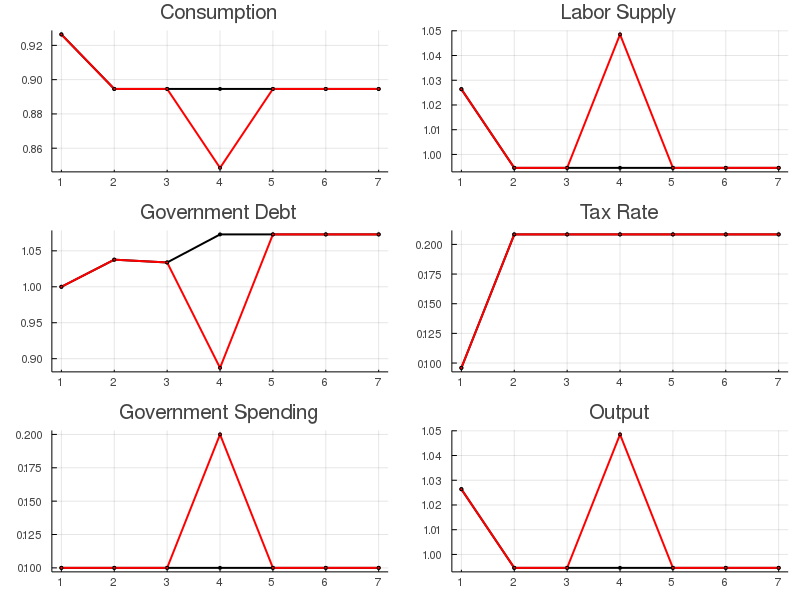

In [6]:
using Random
Random.seed!(42) # Para resultados reprodutíveis.

M_time_example = crra_utility(G=[0.1, 0.1, 0.1, 0.2, 0.1, 0.1],
                              Θ=ones(6))            # Θ pode, em princípio, ser aleatório

M_time_example.Π = [0.0 1.0 0.0 0.0 0.0 0.0;
                    0.0 0.0 1.0 0.0 0.0 0.0;
                    0.0 0.0 0.0 0.5 0.5 0.0;
                    0.0 0.0 0.0 0.0 0.0 1.0;
                    0.0 0.0 0.0 0.0 0.0 1.0;
                    0.0 0.0 0.0 0.0 0.0 1.0]

PP_seq_time = SequentialAllocation(M_time_example)  # Resolva o problema sequencial

sHist_h = [1, 2, 3, 4, 6, 6, 6]
sHist_l = [1, 2, 3, 5, 6, 6, 6]

sim_seq_h = simulate(PP_seq_time, 1.0, 1, 7, sHist_h)
sim_seq_l = simulate(PP_seq_time, 1.0, 1, 7, sHist_l)

using Plots
gr(fmt=:png);
titles = hcat("Consumption",
              "Labor Supply",
              "Government Debt",
              "Tax Rate",
              "Government Spending",
              "Output")

sim_seq_l_plot = [sim_seq_l[1:4]..., M_time_example.G[sHist_l],
                  M_time_example.Θ[sHist_l].*sim_seq_l[2]]
sim_seq_h_plot = [sim_seq_h[1:4]..., M_time_example.G[sHist_h],
                  M_time_example.Θ[sHist_h].*sim_seq_h[2]]

plots = plot(layout=(3,2), size=(800,600))
for i = 1:6
    plot!(plots[i], sim_seq_l_plot[i], color=:black, lw=2,
          marker=:circle, markersize=2, label="")
    plot!(plots[i], sim_seq_h_plot[i], color=:red, lw=2,
          marker=:circle, markersize=2, label="")
    plot!(plots[i], title=titles[i], grid=true)
end
plot(plots)

**Suavização de impostos**

- a taxa de imposto é constante para todos  $ t\geq 1 $  
  
  - Para $ t \geq 1, t \neq 3 $, isso é uma consequência de $ g_t $
    sendo o mesmo em todas esses períodos
  - Para $ t = 3 $, é uma consequência da função utilidade especial de um período a
    que assumimos
  - Sobre outra função de utilidade de um período, o período $ t=3 $ taxa de imposto
    pode ser maior ou menor do que nas datas $ t \geq 1, t \neq 3 $  
  
- A taxa de imposto é a mesma em $ t=3 $ tanto para a altos $ g_t $ tanto para baixos $ g_t $ resultados


Assumimos que em $ t=0 $, o governo deve dívida positiva $ b_0 $.

Ele define o tempo $ t = 0 $ a taxa de imposto parcialmente para reduzir o valor $ u_ {c, 0} b_0 $ de $ b_0 $.

Isso é feito aumentando o consumo no tempo $ t = 0 $ em relação a
consumo em períodos posteriores.

Isso tem a consequência de *aumentar* o tempo $ t = 0 $ do valor bruto
taxa de juros para empréstimos sem risco entre os períodos $ t $ e $ t + 1 $, o que equivale a

$$
R_t = \frac{u_{c,t}}{\beta\mathbb E_{t}[u_{c,t+1}]}
$$

Uma política tributária que torna o tempo $ t = 0 $ de consumo superior ao tempo $ t = 1 $ o consumo evidentemente aumenta a taxa de juros de um período com taxa livre de risco, $ R_t $, a $ t = 0 $.

Aumentar o tempo $ t = 0 $ taxa de juros livre de risco torna o tempo $ t = 0 $
de bens de consumo mais baratos em relação aos bens de consumo em datas posteriores,
abaixando o valor $ u_ {c, 0} b_0 $ da dívida inicial do governo $ b_0 $.

Vemos isso na figura abaixo que traça o caminho do tempo para a taxa de juros livre de risco em ambas as realizações do tempo $ t = 3 $, choque de despesas do governo.

O gráfico a seguir ilustra como o governo reduz a taxa de juros em
tempo 0 aumentando o consumo.

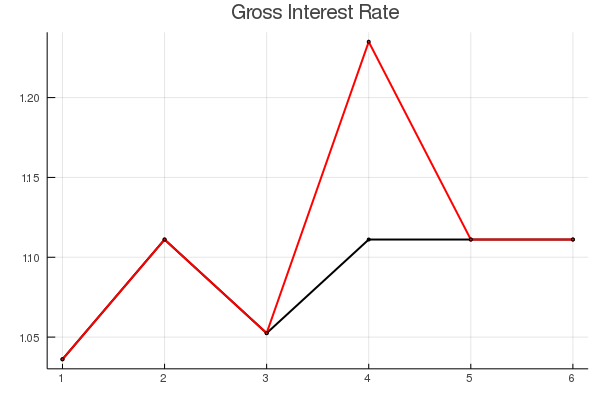

In [7]:
plot(sim_seq_l[end], color=:black, lw=2,
        marker=:circle, markersize=2, label="")
plot!(sim_seq_h[end], color=:red, lw=2,
        marker=:circle, markersize=2, label="")
plot!(title="Gross Interest Rate", grid=true)

### Poupanca Governamental

No período $ t=0 $ o governo evidentemente *despoupa* de modo que $ b_1> b_0 $.

> - Isso é uma consequência de definir uma taxa de imposto *baixa* em $ t=0 $,
   implicando mais consumo em $ t=0 $.  



No período $ t=1 $, o governo evidentemente *poupa* de modo que estabeleceu a taxa de imposto suficientemente alta para permitir $ b_2 < b_1 $.

> - Seu motivo para fazer isso é que ele antecipa uma provável guerra em $ t=3 $.  



No período $ t=2 $ o governo negocia títulos Arrow contingentes do estado
para se proteger contra a guerra em $ t=3 $.

> - Adquire um título que compensa quando $ g_3 = g_h $.  
- Ele vende um título que compensa quando $ g_3 = g_l $.  
- Essas compras são projetadas de forma que, independentemente de
  não há uma guerra em $ t=3 $, o governo começará período
  $ t = 4 $ com a *mesma* dívida do governo.
- O tempo em que $ t = 4 $ o nível da dívida pode ser atendido com as receitas do
  taxa de imposto constante definida às vezes $ t \geq 1 $.



Às vezes, $ t \geq 4 $, o governo renova sua dívida, sabendo que o
taxa de imposto é definida no nível necessário para atender aos pagamentos de juros
sobre as despesas da dívida e do governo.

### Manipulando a Taxa de Juros no Período 0

Vimos que quando $ b_0>0 $, o plano de Ramsey define o tempo $ t=0 $ a
taxa de imposto parcialmente com o objetivo de aumentar a taca de juros livre de risco para empréstimos de um período entre períodos $ t=0 $ e $ t=1 $.

Ao aumentar essa taxa de juros, o plano torna o tempo $ t = 0 $ em produtos baratos
em relação aos bens de consumo posteriormente.

Ao fazer isso, reduz o valor do tempo $ t = 0 $ dívida que herdou
e deve financiar.

### Período 0  e Inconsistência no Tempo

No exemplo anterior, a taxa de imposto de Ramsey no tempo 0 difere do seu valor no tempo 1.

Para explorar o que está acontecendo aqui, vamos simplificar as coisas removendo a possibilidade de guerra no momento $ t = 3 $.

O problema de Ramsey não inclui aleatoriedade porque  $ g_t = g_l $ para todo $ t $.

A figura abaixo mostra as taxas de imposto de Ramsey e as taxas de juros brutas no momento
$ t=0 $ e momento $ t\geq1 $ como funções de dívidas governamentais iniciais
(usando a solução da alocação sequência e uma função de utilidade CRRA definida acima)

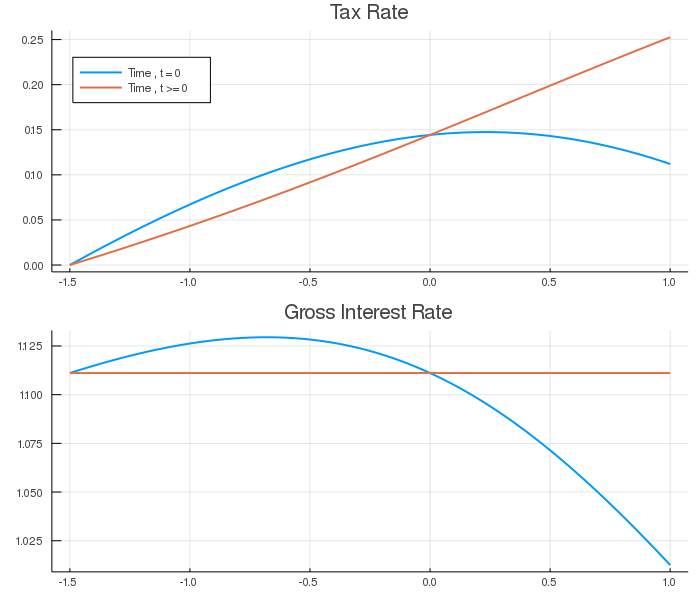

In [8]:
M2 = crra_utility(G=[0.15], Π=ones(1, 1), Θ=[1.0])

PP_seq_time0 = SequentialAllocation(M2) # Resolve o problema sequêncial

B_vec = range(-1.5, 1.0, length = 100)
taxpolicy = Matrix(hcat([simulate(PP_seq_time0, B_, 1, 2)[4] for B_ in B_vec]...)')
interest_rate = Matrix(hcat([simulate(PP_seq_time0, B_, 1, 3)[end] for B_ in B_vec]...)')

titles = ["Tax Rate" "Gross Interest Rate"]
labels = [["Time , t = 0", "Time , t >= 0"], ""]
plots = plot(layout=(2,1), size =(700,600))
for (i, series) in enumerate((taxpolicy, interest_rate))
    plot!(plots[i], B_vec, series, linewidth=2, label=labels[i])
    plot!(plots[i], title=titles[i], grid=true, legend=:topleft)
end
plot(plots)

A figura indica que, se o governo entra com dívida positiva, define
uma taxa de imposto em $ t = 0 $ que é menor do que todas as taxas de imposto posteriores.

Ao definir uma taxa de imposto mais baixa em $ t = 0 $, o governo aumenta o consumo,
o que reduz o *valor* $ u_{c, 0} b_0 $ de sua dívida inicial.

Isso é feito aumentando $ c_0 $ e diminuindo $ u_{c, 0} $.

Por outro lado, se $ b_{0} <0 $, o planejador de Ramsey define a taxa de imposto em $ t = 0 $
superior ao dos períodos subsequentes.

Um efeito colateral da redução do tempo de $ t = 0 $ do consumo é que aumenta a
taxa de juros de um período no tempo 0 acima da dos períodos subsequentes.

Existem apenas dois valores da dívida pública inicial nos quais a taxa de imposto é
constante para todos os $ t \geq 0 $.

O primeiro é $ b_ {0} = 0 $

> - Aqui o governo não pode usar a taxa de imposto de $ t=0 $ para alterar o valor inicial da dívida.  



O segundo ocorre quando o governo entra com ativos suficientemente grandes
que o planejador de Ramsey possa alcançar o primeiro melhor e definir $ \tau_t = 0 $
para todo $ t $.

É apenas por esses dois valores da dívida pública inicial que o Ramsey
o plano é consistente com o tempo.

Outra maneira de dizer isso é que, com exceção desses dois valores de
dívida pública, o plano de Ramsey de continuação não é um plano de Ramsey.

Para ilustrar isso, considere um planejador de Ramsey que comece com um
dívida pública $ b_1 $ associada a um dos planos de Ramsey calculados acima.

Chame $ \tau_1 ^R $ a taxa de imposto $ t = 0 $ escolhida pelo planejador de Ramsey
confrontando esse valor para a dívida inicial do governo.

A figura abaixo mostra a taxa de imposto no momento 1 escolhida pelo nosso Planejador de Ramsey original
e o que um novo planejador de Ramsey escolheria para seu
tempo $ t = 0 $ taxa de imposto

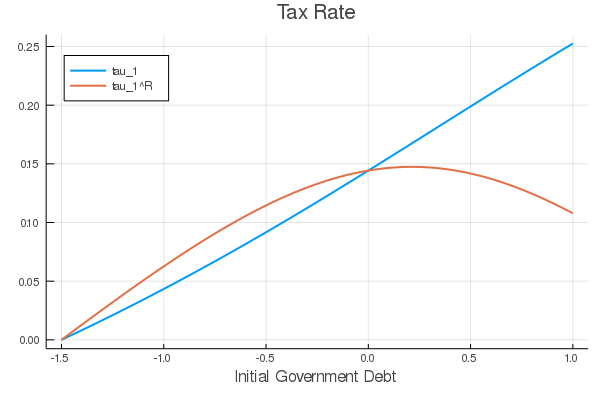

In [9]:
# Calcula a dívida inscrita no momento 1
B1_vec = hcat([simulate(PP_seq_time0, B_, 1, 2)[3][2] for B_ in B_vec]...)'

# Calcula a política ideal se o governo puder redefinir
tau1_reset = Matrix(hcat([simulate(PP_seq_time0, B1, 1, 1)[4] for B1 in B1_vec]...)')

plot(B_vec, taxpolicy[:, 2], linewidth=2, label="tau_1")
plot!(B_vec, tau1_reset, linewidth=2, label="tau_1^R")
plot!(title="Tax Rate", xlabel="Initial Government Debt", legend=:topleft, grid=true)

As taxas de imposto na figura são iguais para apenas dois valores da dívida inicial do governo.

### Suavisação de Impostos e Preferências não CRRA

A suavização completa de impostos para $ t \geq 1 $ no exemplo anterior é uma
consequência de termos assumido as preferências do CRRA.

Para ver o que está impulsionando esse resultado, começamos observando que a taxa de imposto de Ramsey para $ t \geq 1 $ é
uma função invariável no tempo $ \tau (\Phi, g) $ do multiplicador Lagrange na restrição de implementabilidade e as despesas do governo.

Para preferências de CRRA, podemos explorar as relações $ U_{cc} c = - \sigma U_c $
e $ U_{nn} n = \gamma U_n $ para derivar

$$
\frac{(1+(1-\sigma)\Phi)U_c}{(1+(1-\gamma)\Phi)U_n} = 1
$$

A partir das condições de primeira ordem.

Esta equação implica imediatamente que a taxa de imposto é constante.

Para outras preferências, a taxa de imposto pode não ser constante.

Por exemplo, deixe a função de utilidade do período ser

$$
u(c,n) = \log(c) + 0.69 \log(1-n)
$$

Escreveremos um novo construtor LogUtility para representar esta função de utilidade

In [10]:
function log_utility(;β = 0.9,
                      ψ = 0.69,
                      Π = 0.5 * ones(2, 2),
                      G = [0.1, 0.2],
                      Θ = ones(2),
                      transfers = false)
    # Derivadas da função utilidade
    U(c,n) = log(c) + ψ * log(1 - n)
    Uc(c,n) = 1 ./ c
    Ucc(c,n) = -c.^(-2.0)
    Un(c,n) = -ψ ./ (1.0 .- n)
    Unn(c,n) = -ψ ./ (1.0 .- n).^2.0
    n_less_than_one = true
    return Model(β, Π, G, Θ, transfers,
                U, Uc, Ucc, Un, Unn, n_less_than_one)
end

log_utility (generic function with 1 method)

Suponha também que $ g_t $ siga dois estados i.i.d. com igual
probabilidades associadas a $ g_l $ e $ g_h $.

Para calcular a taxa de imposto, usaremos as abordagens sequencial e recursiva descritas acima.

A figura abaixo mostra um caminho de amostra da taxa de imposto de Ramsey

diff = 0.0003504611535379196 
diff = 0.00015763906388123851 
diff = 7.124337606645018e-5 
diff = 3.2356917242389125e-5 
diff = 1.4829540976261937e-5 
diff = 6.9104341194283816e-6 
diff = 3.323222470321399e-6 
diff = 1.6870560419905608e-6 
diff = 9.29342141847281e-7 


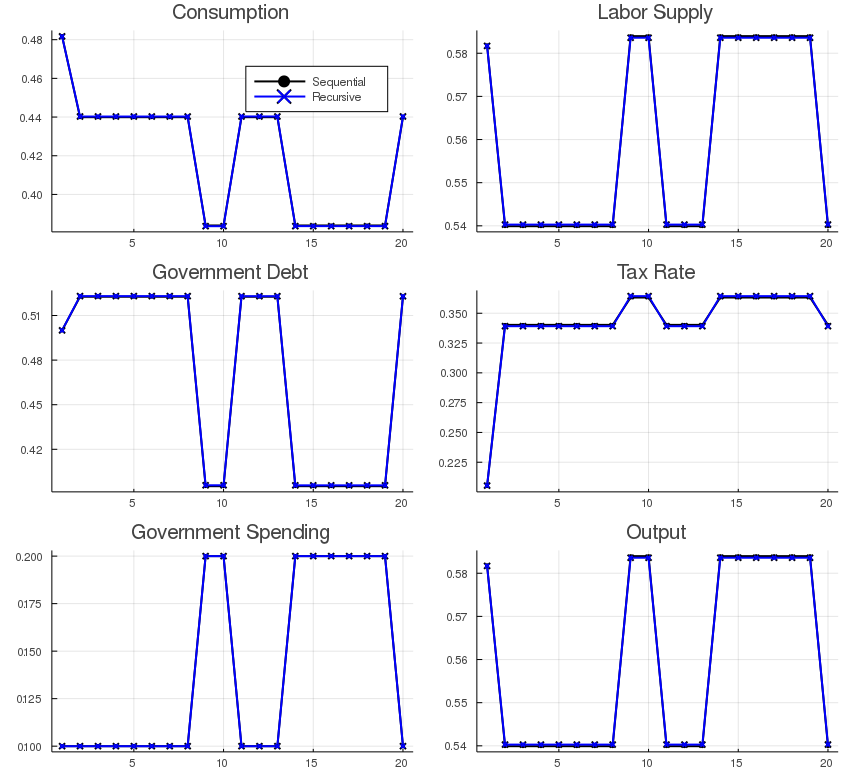

In [11]:
M1 = log_utility()
μ_grid = range(-0.6,  0.0, length = 200)
PP_seq = SequentialAllocation(M1)         # Resolve o problem sequêncial
PP_bel = RecursiveAllocation(M1, μ_grid)  # Resolve o problem recursivo

T = 20
sHist = [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1]

# Simulate
sim_seq = simulate(PP_seq, 0.5, 1, T, sHist)
sim_bel = simulate(PP_bel, 0.5, 1, T, sHist)

# Plot policies
sim_seq_plot = [sim_seq[1:4]..., M1.G[sHist], M1.Θ[sHist].*sim_seq[2]]
sim_bel_plot = [sim_bel[1:4]..., M1.G[sHist], M1.Θ[sHist].*sim_bel[2]]

titles = hcat("Consumption",
              "Labor Supply",
              "Government Debt",
              "Tax Rate",
              "Government Spending",
              "Output")
labels = [["Sequential", "Recursive"], ["",""], ["",""], ["",""], ["",""], ["",""]]
plots=plot(layout=(3,2), size=(850,780))

for i = 1:6
    plot!(plots[i], sim_seq_plot[i], color=:black, lw=2, marker=:circle,
          markersize=2, label=labels[i][1])
    plot!(plots[i], sim_bel_plot[i], color=:blue, lw=2, marker=:xcross,
          markersize=2, label=labels[i][2])
    plot!(plots[i], title=titles[i], grid=true, legend=:topright)
end
plot(plots)

Como era de se esperar, as soluções recursivas e sequenciais produzem quase
alocações idênticas.

Diferentemente dos resultados com as preferências do CRRA, a taxa de imposto não é perfeitamente suavizada.

Em vez disso, o governo aumenta a taxa de imposto quando $ g_t $ é alto.

## Comentários Adicionais

Há uma [aula relacionada](https://julia.quantecon.org/amss.html) em que se descreve uma extensão do modelo Lucas-Stokey
por Aiyagari, Marcet, Sargent e Seppälä (2002)[AMSS02](https://julia.quantecon.org/../zreferences.html#amss2002).

Na economia AMSS, apenas um título livre de risco é negociado.

Essa aula compara a representação recursiva do modelo Lucas-Stokey
apresentado nesta aula com um para uma economia AMSS.

Ao comparar essas formulações recursivas, coletaremos um sentido no qual as
A dimensão do estado é menor no modelo de Lucas Stokey.

Acompanhando essa diferença de dimensão, haverá diferentes dinâmicas da dívida pública.